In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (modify the file path as needed)
data = pd.read_csv('TaxiDataCleaned.csv')

# Check the structure of the data
print(data.head())

  pickup_community_area   fare  trip_start_month  trip_start_hour  \
0               Unknown  12.45                 5               19   
1               Unknown   0.00                 3               19   
2                  60.0  27.05                10                2   
3                  10.0   5.85                10                1   
4                  14.0  16.65                 5                7   

   trip_start_day trip_start_timestamp  pickup_latitude  pickup_longitude  \
0               6  2014-05-16 19:45:00        41.892508        -87.633308   
1               5  2013-03-07 19:15:00        41.892508        -87.633308   
2               3  2013-10-01 02:15:00        41.836150        -87.648788   
3               2  2013-10-21 01:30:00        41.985015        -87.804532   
4               5  2013-05-30 07:00:00        41.968069        -87.721559   

   dropoff_latitude  dropoff_longitude  trip_miles dropoff_census_tract  \
0         41.893216         -87.634156         

# **Part A**  
Created bar graphs for visualising trip distribution. \\



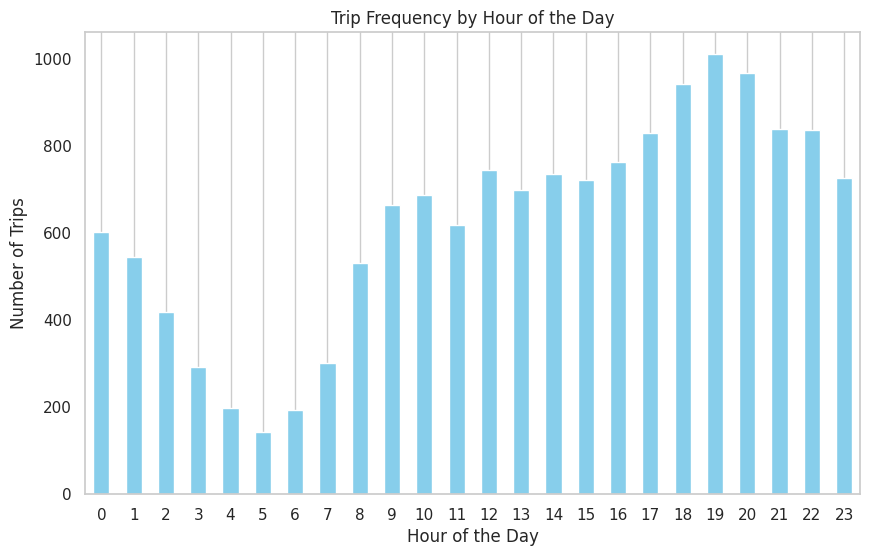

In [14]:
# Group by trip_start_hour and count trips
hourly_counts = data['trip_start_hour'].value_counts().sort_index()

# Plot the bar chart for hours of the day
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

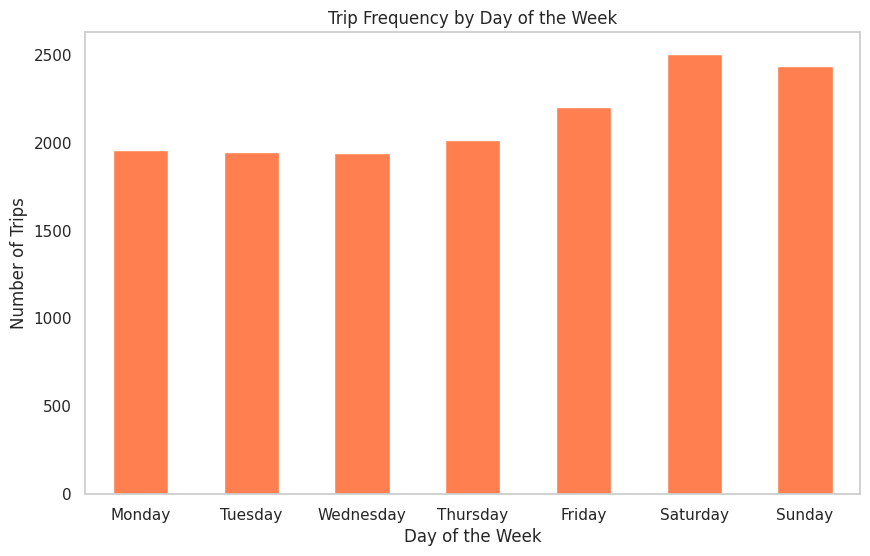

In [22]:
# Map numeric day values to names
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Replace numeric values with names in a new column
data['trip_start_day_name'] = data['trip_start_day'].map(day_mapping)

# Group by trip_start_day_name and count trips
day_counts = data['trip_start_day_name'].value_counts().reindex(day_mapping.values())


# Plot the bar chart for days of the week
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='coral')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='both')
plt.show()

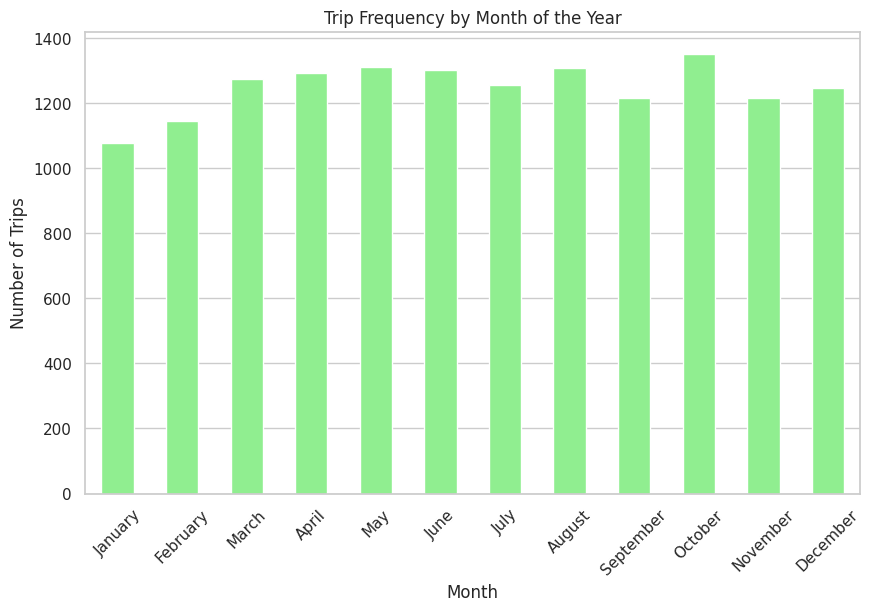

In [24]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replace numeric month values with names in a new column
data['trip_start_month_name'] = data['trip_start_month'].map(month_mapping)

# Group by trip_start_month_name and count trips
month_counts = data['trip_start_month_name'].value_counts().reindex(month_mapping.values())

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Trip Frequency by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

# Notable Patterns and Insights
**Peak Hours:** \\
Peak hours often occur during morning office time(9-11) and late evening (returning hours 18-20). In the afternoon, the demand stays almost the same, a bit lesser than morning hours. These peaks reflect typical workday commuting patterns. \\


**High-Demand Days:** \\
Weekdays, particularly Monday to Friday, show lower demand compared to weekends, as people may go out on picnics. weekend nights might be the reason for high demand of trips. \\

**Peak Months:** \\
High demand in certain months could be linked to specific events or seasonal travel patterns. For example, summer months might have more demand due to increased tourism, while holiday seasons (like October considering diwali and other festivals) may see a spike due to festivities and holiday travel.

#Implications for Managing Taxi Demand

* Fleet Allocation: During peak hours, allocate more taxis in high-demand areas (like downtown or commercial districts) to ensure availability.

* Flexible Pricing: Implement dynamic pricing to manage high demand
during peak times or special events.
* Driver Scheduling: Schedule more drivers during high-demand times and allow for flexible shifts to accommodate fluctuating demand.
* Seasonal Planning: Anticipate demand spikes in specific months or seasons and prepare resources accordingly, such as increasing fleet availability in tourist-heavy months.

#**Part b**


a) Creation of a heatmap to show trip frequency by hour and day

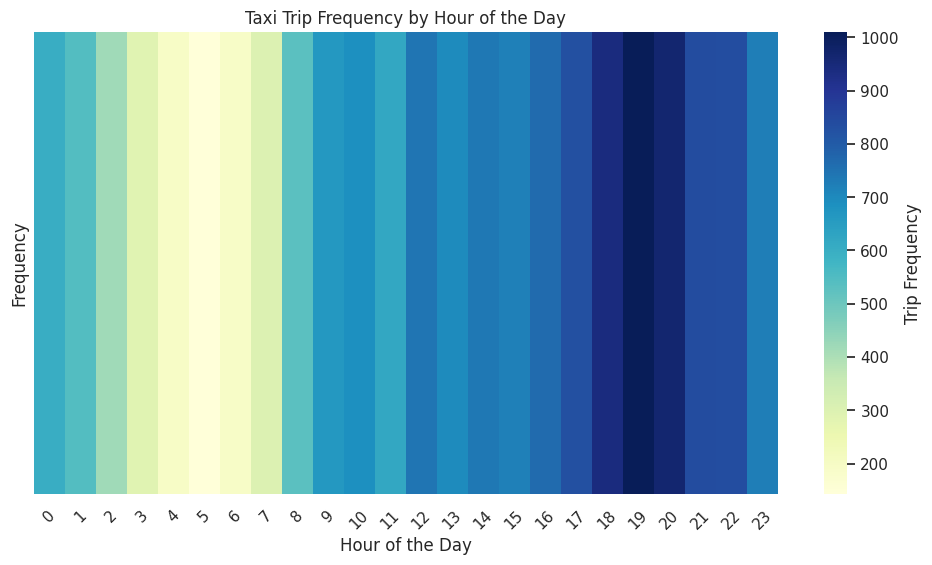

In [36]:

df = pd.read_csv('TaxiData.csv')

# Group the data by hour to get total trip frequency for each hour
hourly_trip_counts = df.groupby('trip_start_hour').size().reset_index(name='trip_count')

# Reshape the data to a format suitable for a heatmap
heatmap_data = hourly_trip_counts.set_index('trip_start_hour').T  # Transpose the DataFrame for heatmap

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='d', cbar_kws={'label': 'Trip Frequency'})

# Setting labels and title
plt.title('Taxi Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.yticks([])  # Remove y-tick labels since it's a single row

plt.show()

b) Histogram to analyse distribution of trip distance during peak hours.


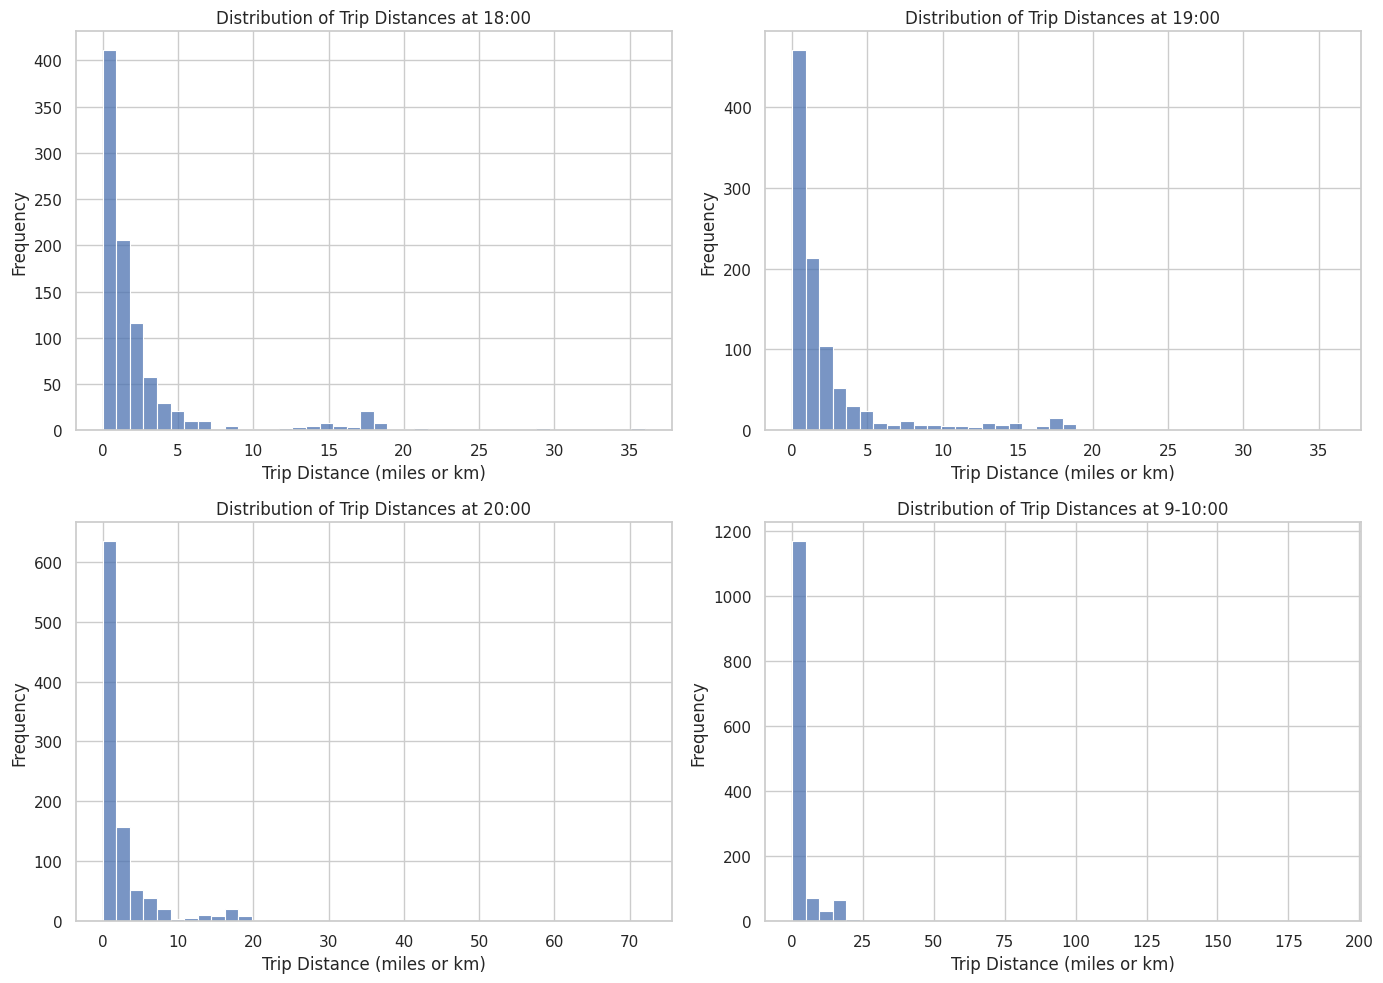

In [38]:

# Define peak hours (9 and 10 will be combined into one plot)
peak_hours = [18, 19, 20, 9, 10]

# Filter trips during peak hours
peak_hour_trips = df[df['trip_start_hour'].isin(peak_hours)]

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histogram for each peak hour in the respective subplot
for i, hour in enumerate([18, 19, 20]):
    ax = axes[i//2, i%2]  # Select the subplot location
    hour_trips = peak_hour_trips[peak_hour_trips['trip_start_hour'] == hour]
    sns.histplot(hour_trips['trip_miles'], bins=40, ax=ax)
    ax.set_title(f'Distribution of Trip Distances at {hour}:00')
    ax.set_xlabel('Trip Distance (miles or km)')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Combine 9 and 10 into one subplot
ax_combined = axes[1, 1]  # Bottom-right subplot
combined_trips = peak_hour_trips[peak_hour_trips['trip_start_hour'].isin([9, 10])]
sns.histplot(combined_trips['trip_miles'], bins=40, ax=ax_combined)
ax_combined.set_title('Distribution of Trip Distances at 9-10:00')
ax_combined.set_xlabel('Trip Distance (miles or km)')
ax_combined.set_ylabel('Frequency')
ax_combined.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#Combined Effect of Peak Hours and Trip Distances on Taxi Service Efficiency

**Distance Trends:** \\
The majority of trips during peak hours are short-distance trips (less than 5 miles/km), with very few trips extending beyond 20 miles/km.
This suggests that most trips are likely within densely populated or central urban areas where travel distances are relatively short.
Impact on Efficiency:

**High Turnover:** \\
 Shorter trips mean that taxis can complete more rides per hour, potentially increasing revenue per vehicle during peak times. However, high turnover also demands efficient pickup and drop-off processes, especially in busy urban areas. \\
**Increased Traffic and Congestion:** \\
 The concentration of short trips in urban areas during peak hours can lead to significant congestion, particularly around popular pickup and drop-off locations. This may reduce average trip speeds and increase the time needed for each trip, thereby lowering service efficiency. \\
**Wait Times:** \\
 With high demand for short trips, some passengers may experience longer wait times, as taxis frequently cycle between rides in high-density areas, making it harder to serve less accessible locations.
#Implications for Taxi Operations:

**Fleet Management:**  \\
Allocating more taxis to high-demand areas during peak hours may help reduce wait times. However, taxis should be distributed strategically to avoid overcrowding in specific areas and to improve service coverage.
Route Optimization: Encouraging alternative routes or using real-time traffic data could help alleviate congestion and maintain higher average speeds for each trip. \\
**Pricing Models:** \\
 Dynamic or zone-based pricing may be used to manage demand during peak hours in congested zones. Additionally, offering incentives for off-peak travel or longer trips could help balance demand throughout the day. \\
In summary, while short-distance trips during peak hours allow for a high volume of rides, the associated congestion and demand can strain service efficiency. Efficient fleet management, pricing strategies, and real-time routing adjustments are essential to optimize operations under these conditions.

#**Part c**


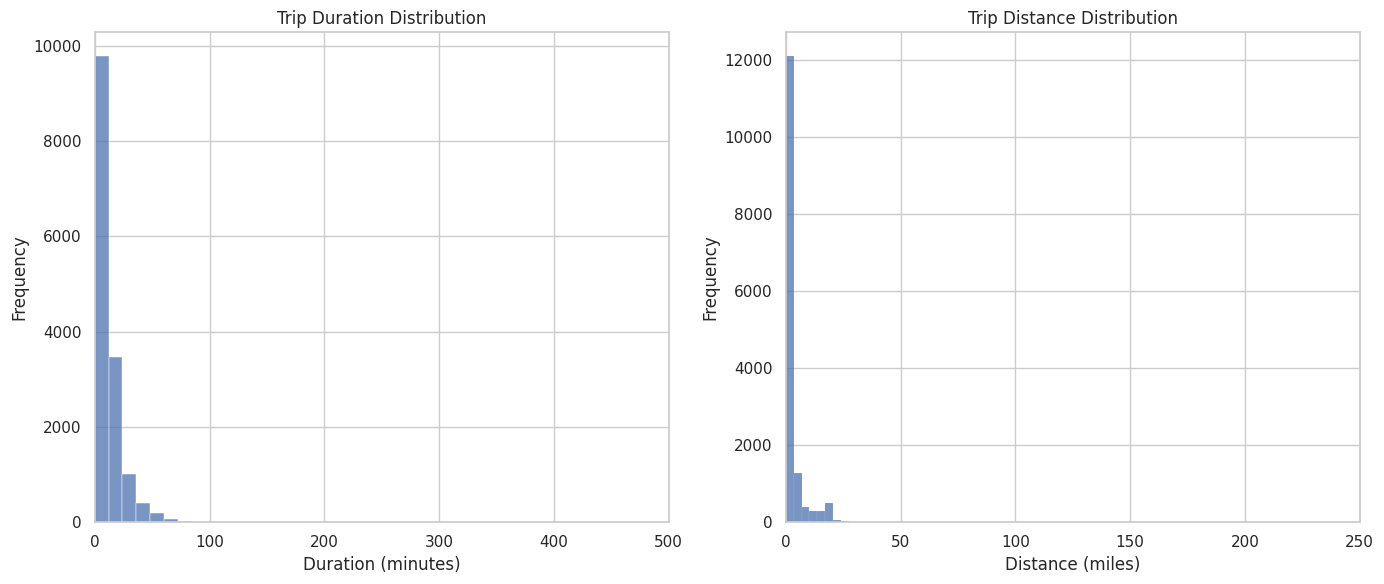

In [27]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the histogram for trip duration
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['trip_seconds']/60, bins=100)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.xlim(0, 500)
plt.ylabel('Frequency')

# Create the histogram for trip distance
plt.subplot(1, 2, 2)
sns.histplot(df['trip_miles'], bins=500)
plt.title('Trip Distance Distribution')
plt.xlim(0, 250)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

b) Correlation analysis between trip duration and distance.

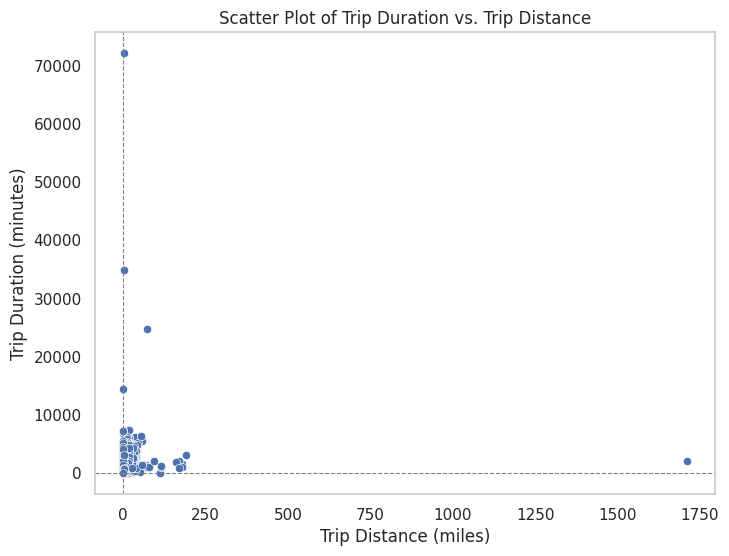

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_miles', y='trip_seconds', data=df)
plt.title('Scatter Plot of Trip Duration vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a horizontal line at y=0
plt.axvline(0, color='grey', lw=0.8, ls='--')  # Add a vertical line at x=0
plt.grid()
plt.show()

From the histograms plotted we can see that most of the trips have a duration of less than 20-30 minutes and distance less than 2-3 kms which shows that most of the trips are for close movements

In the scatter plot provided, which shows trip duration (in minutes) versus trip distance (in miles), several observations can be made: \\
**Outliers**: There are a few clear outliers that could significantly influence data analysis and decision-making:

A point at around 1,750 miles and with a relatively low trip duration. This trip appears to have an unusually low duration for its distance, suggesting potential data entry errors or an exceptional mode of travel (e.g., air or high-speed transport). \\
Several points with very high trip durations (up to 70,000 minutes) but very short distances (close to zero miles). These could represent trips with significant delays, vehicle breakdowns, or data anomalies. \\
**Clustered Pattern**: The majority of the data points are concentrated within a short distance range (0 to ~50 miles) and trip durations below 10,000 minutes. This clustering suggests that most trips are short-distance and reasonably timed, which could indicate a predominance of urban or local travel.

**Influence on Route Planning:**

The outliers with unusually high trip durations could impact averages or predictive models, potentially skewing results and leading to incorrect estimations if not managed properly (e.g., through data cleaning or using robust statistical methods). \\
The presence of long trips with short durations or high durations for very short trips could inform route planning by identifying irregular patterns such as unexpected delays or uncommon trip characteristics.
Understanding these patterns and addressing the outliers will help refine route planning strategies, optimize travel time estimates, and manage logistical challenges in practical applications.



# Part d

<ipython-input-29-df83a08f2e53>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats = df.groupby('trip_start_month').agg(


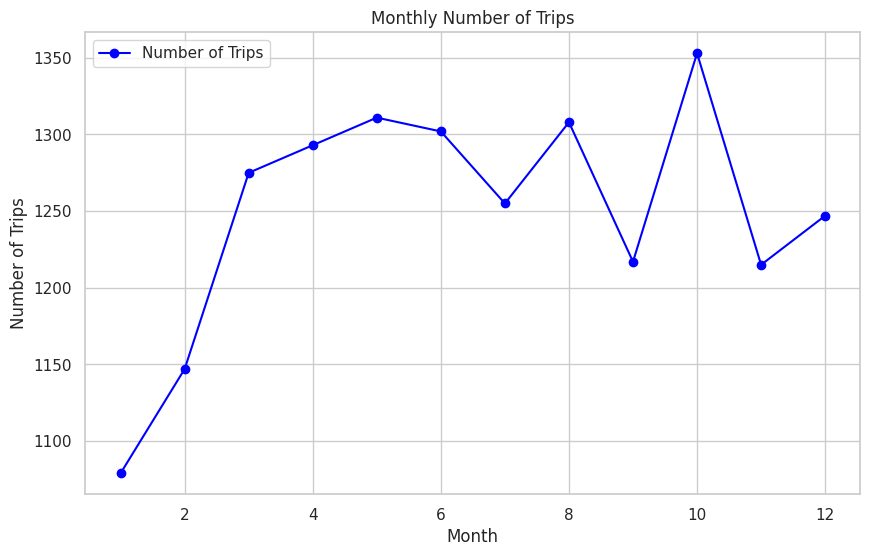

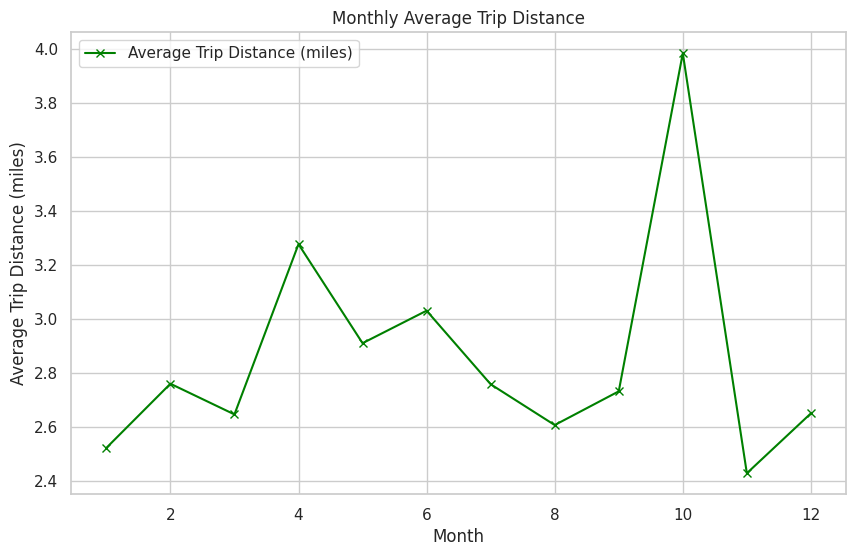

In [29]:
df['trip_start_month'] = pd.Categorical(df['trip_start_month'], categories=range(1, 13), ordered=True)

# Calculate the number of trips and average trip distance by month
monthly_stats = df.groupby('trip_start_month').agg(
    trip_count=('trip_miles', 'size'),           # Count of trips per month
    avg_trip_distance=('trip_miles', 'mean')      # Average trip distance per month
).reset_index()

# Plotting the number of trips by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_stats['trip_start_month'], monthly_stats['trip_count'], color='blue', marker='o', label='Number of Trips')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Monthly Number of Trips')
plt.legend()
plt.show()

# Plotting the average trip distance by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_stats['trip_start_month'], monthly_stats['avg_trip_distance'], color='green', marker='x', label='Average Trip Distance (miles)')
plt.xlabel('Month')
plt.ylabel('Average Trip Distance (miles)')
plt.title('Monthly Average Trip Distance')
plt.legend()
plt.show()

**Interpretation**:

1.   Low number of trips during january and february.
2.   Peak number of trips during october due to the festive season at that time.
3. Higher average distance during October which shows people travel longer distances due to festivals as they might be going to meet relatives and their native places
4.  The average distance during january, february, march and august which shows people might be using taxis mostly for going to offices and work.



# Part e



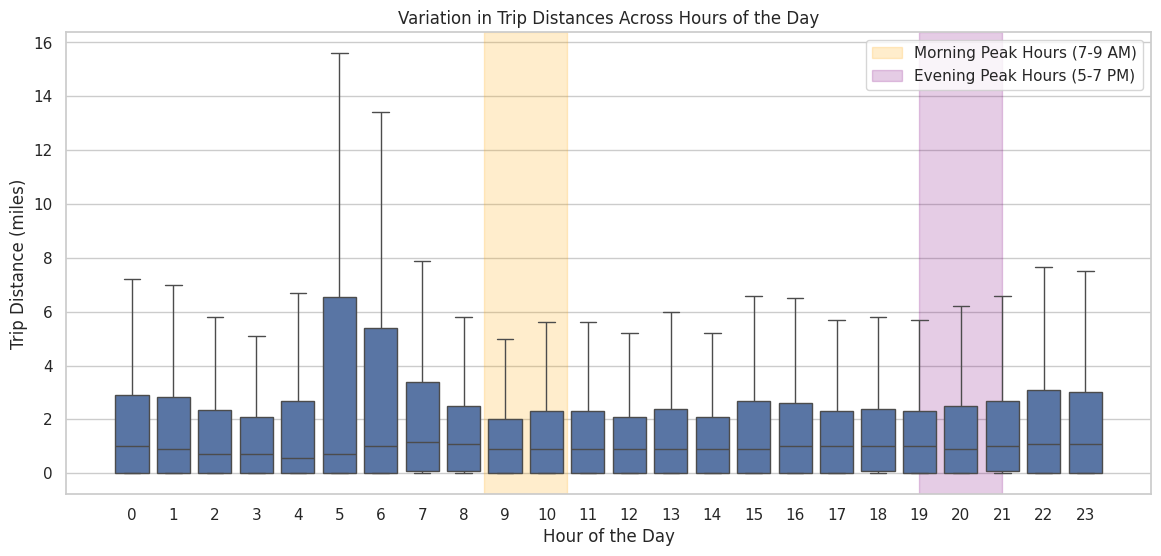

In [39]:
# Create a boxplot of trip distances across each hour of the day
plt.figure(figsize=(14, 6))
sns.boxplot(x='trip_start_hour', y='trip_miles', data=df, showfliers=False)

# Labeling the axes and title
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Distance (miles)')
plt.title('Variation in Trip Distances Across Hours of the Day')

# Highlighting typical peak hours (example: 7-9 AM and 5-7 PM)
plt.axvspan(8.5, 10.5, color='orange', alpha=0.2, label='Morning Peak Hours (7-9 AM)')
plt.axvspan(19, 21, color='purple', alpha=0.2, label='Evening Peak Hours (5-7 PM)')

# Adding legend
plt.legend()

# Display the plot
plt.show()

The above boxplot shows the variation of the data across different hours. \\
There is less variation during the peak hours as more people are travelling for going to their workplaces. The variance is high during non peak hours as there are possibly some long distances for going to non work places which might include going on long drives or parties at farther places. Therefore, we analyse the variation across different hours of the day.